In [1]:
from konlpy.tag import Okt
import collections

okt = Okt()
f = open('output_tmp.txt', 'r', encoding='utf8')
cnt = 0
stop_words = ['생각','그냥','계속','정말','지금','다시','처음','저희', '혹시', '오늘',
              '확인', '가능성', '추천', '자꾸', '전혀', '그때', '바로', '부분', '이후',
              '거의','건가','보통', '냉이', '저번', '안해', '살짝', '조금', '가요',
              '시작', '질문', '답변', '다음', '때문', '어제', '중간', '원래', '경우','물이','뭔가','만약','정도']
not_stop_words = ['집', '술', '약', '방']
pair_counter = collections.Counter()
while True:
    sentence = f.readline()
    if not sentence:
        break
    l = okt.nouns(sentence)
    if len(l) == 0:
        continue
    l = [i for i in l if (i not in stop_words and len(i) > 1) or i in not_stop_words]
    tmp = []
    for i in l:
        if i == '여친':
            i = '여자친구'
            tmp.append(i)
        elif i == '남친':
            i = '남자친구'
            tmp.append(i)
        else:
            tmp.append(i)
    l = tmp
    l = [(i, j) for i in l for j in l]
    for i, j in l:
        if i != j:
            pair_counter[i, j]+=1
    cnt += 1
tmp_counter = collections.Counter()
tmp_set = set()
for i, j in pair_counter:
    if (j, i) in tmp_set:
        tmp_counter[i, j] = pair_counter[i, j]
    else:
        tmp_set.add((i, j))
pair_counter = pair_counter & tmp_counter
print(pair_counter.most_common(100))

[(('콘돔', '관계'), 2858), (('임신', '콘돔'), 2402), (('사정', '콘돔'), 2344), (('생리', '콘돔'), 2134), (('생리', '관계'), 1482), (('정액', '콘돔'), 1277), (('임신', '생리'), 1262), (('피임', '콘돔'), 1232), (('임신', '관계'), 1115), (('여자친구', '콘돔'), 1114), (('착용', '콘돔'), 1087), (('약', '콘돔'), 960), (('사정', '관계'), 949), (('임신', '사정'), 862), (('약', '피임'), 827), (('생리', '사정'), 779), (('걱정', '콘돔'), 716), (('사용', '콘돔'), 712), (('성관계', '콘돔'), 690), (('피임', '생리'), 682), (('상태', '콘돔'), 662), (('약', '생리'), 651), (('성기', '콘돔'), 626), (('사후', '콘돔'), 602), (('피임', '관계'), 588), (('콘돔', '남자친구'), 585), (('피임', '사후'), 562), (('약', '관계'), 554), (('약', '사후'), 540), (('임기', '콘돔'), 528), (('예정일', '생리'), 495), (('관계', '여자친구'), 477), (('피임', '임신'), 466), (('사후', '생리'), 465), (('콘돔', '여성'), 465), (('질외', '콘돔'), 460), (('쿠퍼액', '콘돔'), 454), (('질내사정', '콘돔'), 448), (('삽입', '콘돔'), 441), (('발기', '콘돔'), 434), (('정액', '관계'), 426), (('관계', '착용'), 386), (('예정일', '콘돔'), 377), (('약', '임신'), 376), (('사정', '질외'), 371), (('사정', '여자친구'), 369), (('주기', '생리'),

D:\PycharmProjects\text_processing\venv\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


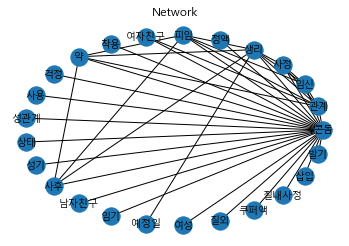

NodeView(('콘돔', '관계', '임신', '사정', '생리', '정액', '피임', '여자친구', '착용', '약', '걱정', '사용', '성관계', '상태', '성기', '사후', '남자친구', '임기', '예정일', '여성', '질외', '쿠퍼액', '질내사정', '삽입', '발기'))

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import networkx as nx
plt.rc('font', family='Malgun Gothic')
plt.title('Network')
g = nx.Graph()
mydict = dict(pair_counter.most_common(40))
g.add_edges_from(mydict.keys())
pos=nx.circular_layout(g)

nx.draw_circular(g)
nx.draw_networkx_labels(g, pos, font_family='Malgun Gothic', font_size=10)
plt.show()
g.nodes()

In [5]:
from konlpy.tag import Okt
import collections

okt = Okt()
f = open('output_tmp.txt', 'r', encoding='utf8')
cnt = 0
stop_words = ['생각','그냥','계속','정말','지금','다시','처음','저희', '혹시', '오늘',
              '확인', '가능성', '추천', '자꾸', '전혀', '그때', '바로', '부분', '이후',
              '거의','건가','보통', '냉이', '저번', '안해', '살짝', '조금', '가요',
              '시작', '질문', '답변', '다음', '때문', '어제', '중간', '원래', '경우','물이','뭔가','만약','정도']
not_stop_words = ['집', '술', '약', '방']
texts = []
while True:
    sentence = f.readline()
    if not sentence:
        break
    l = okt.nouns(sentence)
    if len(l) == 0:
        continue
    l = [i for i in l if (i not in stop_words and len(i) > 1) or i in not_stop_words]
    tmp = []
    for i in l:
        if i == '여친':
            i = '여자친구'
            tmp.append(i)
        elif i == '남친':
            i = '남자친구'
            tmp.append(i)
        else:
            tmp.append(i)
    l = tmp
    texts.append(l)




In [6]:
from gensim import corpora, models
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = models.ldamodel.LdaModel(corpus, num_topics=3, id2word=dictionary)

In [11]:
ldamodel.print_topics(num_words=6)

[(0,
  '0.120*"콘돔" + 0.053*"생리" + 0.053*"관계" + 0.048*"임신" + 0.040*"사정" + 0.020*"피임"'),
 (1,
  '0.082*"콘돔" + 0.037*"약" + 0.032*"피임" + 0.026*"임신" + 0.025*"생리" + 0.022*"관계"'),
 (2,
  '0.039*"콘돔" + 0.019*"관계" + 0.016*"여자친구" + 0.016*"피임" + 0.015*"생리" + 0.012*"착용"')]

In [10]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.95808804), (1, 0.021027345), (2, 0.020884607)]